In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('../dataset/houses.csv')
data.head()

,Description,Type,Price,Price Type,Video,Down Payment,Area (m²),Bedrooms,Bathrooms,Level,Furnished,Virtual Tour,Area,City,Electricity Meter,Built in Kitchen Appliances,Water Meter,Elevator,Balcony,Natural Gas,Landline,Security,Central A/C & heating,Covered Parking,Pets Allowed,Private Garden,Maids Room,Pool,Compound
0,شقة فندقية للايجار المفروش في مدينتي في B11 ار...,Apartment,"35,000",Price,Not Available,"35,000",165,3,3,Ground,Yes,Not Available,Madinaty,Madinaty,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,NaN
1,For Rent Apartment In Uptown Cairo - Sierras\n...,Apartment,"77,000",Price,Not Available,NaN,225,3,3,NaN,Yes,Not Available,Uptown Cairo,Mokattam,No,No,No,No,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,NaN
2,خطوات من عباس العقاد\nبشارع رئيسي مميز جدا \nع...,Apartment,"30,000",Price,Not Available,"30,000",280,4,3,1,NaN,Not Available,Nasr City,Cairo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,شقه مفروشه سوبر لوكس للايجار اليومي في موقع مم...,Apartment,"1,500",Price,Not Available,NaN,120,3,2,2,Yes,Not Available,Nasr City,Cairo,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,NaN
4,J-V\n\nKatameya Heights\nNew Cairo\nDeveloper ...,Apartment,"160,000",Price,Not Available,NaN,13.935,2,3,1,Yes,Not Available,Katameya Heights,New Cairo,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12066 entries, 0 to 12065
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Description                  12066 non-null  object
 1   Type                         12066 non-null  object
 2   Price                        12066 non-null  object
 3   Price Type                   12066 non-null  object
 4   Video                        12066 non-null  object
 5   Down Payment                 2697 non-null   object
 6   Area (m²)                    12066 non-null  object
 7   Bedrooms                     12066 non-null  object
 8   Bathrooms                    12066 non-null  int64 
 9   Level                        11499 non-null  object
 10  Furnished                    10792 non-null  object
 11  Virtual Tour                 12066 non-null  object
 12  Area                         12026 non-null  object
 13  City                         12

<Axes: >

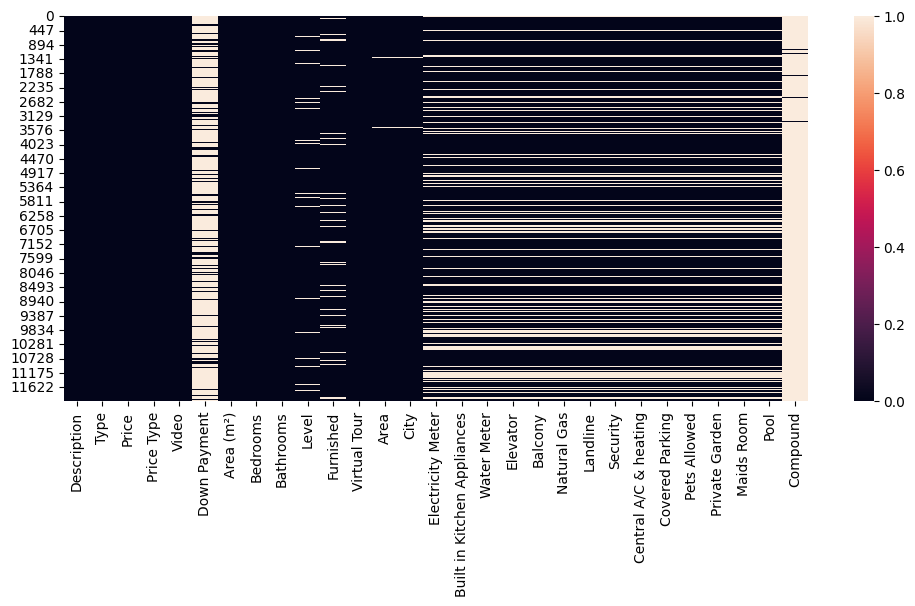

In [4]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isna())

In [5]:
original_df = data.copy()

## Here is the cleaning process:
1. Clean continuous columns.
2. Clean categorical columns.
3. Encode the boolean/categorical columns.
2. Impute the missing values.

In [6]:
data[data.duplicated()]

,Description,Type,Price,Price Type,Video,Down Payment,Area (m²),Bedrooms,Bathrooms,Level,Furnished,Virtual Tour,Area,City,Electricity Meter,Built in Kitchen Appliances,Water Meter,Elevator,Balcony,Natural Gas,Landline,Security,Central A/C & heating,Covered Parking,Pets Allowed,Private Garden,Maids Room,Pool,Compound


In [7]:
data['Type'].unique()

array(['Apartment', 'Duplex', 'Studio', 'Penthouse', 'Room'], dtype=object)

In [8]:
data['Price'].unique()

array(['35,000', '77,000', '30,000', '1,500', '160,000', '22,000',
       '8,300', '80,000', '13,000', '300', '17,000', '45,000', '3,000',
       '20,000', '1,000', '66,000', '40,000', '12,000', '69,500',
       '38,000', '27,000', '24,000', '7,500', '6,000', '19,000', '16,000',
       '25,000', '50,000', '184,000', '18,000', '10,000', '60,000',
       '15,000', '75,000', '9,500', '1,300', '55,000', '23,000', '49,000',
       '26,000', '70,000', '8,000', '2,000', '11,000', '9,000', '7,000',
       '13,500', '8,500', '1,700', '16,500', '29,000', '4,500', '14,000',
       '6,500', '1,200', '5,500', '32,000', '2,250', '800', '11,500',
       '5,800', '24,500', '1,600', '1,750', '5,000', '28,000', '3,500',
       '1,650', '500', '6,000,000', '10,500', '2,500', '48,000', '15,500',
       '12,500', '2,100', '47,000', '29,500', '65,000', '4,000', '600',
       '85,000', '3,200', '700', '4,500,000', '1,550', '100,000',
       '43,000', '39,000', '53,000', '18,500', '41,000', '31,000',
       '

In [9]:
def remove_comma(value):
    return re.sub(',', '', value)

data['Price'] = data['Price'].apply(remove_comma)

In [10]:
data['Area (m²)'].unique()

array(['165', '225', '280', '120', '13.935', '197', '78', '700', '140',
       '170', '162', '187', '200', '233', '122', '115', '60', '160',
       '25.827', '116', '17.466', '131', '17.652', '143', '220', '95',
       '400', '211', '156', '149', '130', '100', '163', '155', '144',
       '65', '270', '27.871', '82', '13.471', '300', '11.148', '150',
       '106', '127', '350', '139', '580', '17.28', '90', '96', '180',
       '152', '89', '99', '345', '193', '84', '320', '182', '175', '14.4',
       '370', '55', '250', '133', '230', '104', '107', '70', '157', '145',
       '185', '148', '194', '103', '188', '75', '112', '119', '135', '67',
       '186', '18.581', '30', '190', '240', '92', '125', '146', '20',
       '319', '132', '142', '208', '17.837', '110', '118', '310', '134',
       '81', '80', '105', '256', '385', '50', '136', '154', '8.268',
       '210', '235', '10', '305', '111', '195', '215', '172', '260',
       '161.001', '11.613', '13.006', '167', '85', '123', '40', '450',
 

In [11]:
data['Area (m²)'] = data['Area (m²)'].apply(remove_comma)

In [12]:
data['Bedrooms'].unique()

array(['3', '4', '2', '1', '5', '10', '6', '7', '10+', '8', '9'],
      dtype=object)

In [13]:
idx = data.query('Bedrooms == "10+"').index
data = data.drop(index=idx)

In [14]:
data['Bathrooms'].unique()

array([3, 2, 1, 5, 4, 8, 6, 7], dtype=int64)

In [15]:
data['Level'].unique()

array(['Ground', nan, '1', '2', '5', '3', '4', '6', '8', '7', '9', '10+',
       '10', 'Highest'], dtype=object)

In [16]:
# Encode `Level` Values
def encode_level(level):
    if level == 'Ground':
        level = 0
    if level == '10+':
        level = 11
    if level == 'Highest':
        level = 12
    return level

data['Level'] = data['Level'].apply(encode_level)

In [17]:
data['Furnished'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [18]:
def encode_bool(value):
    if value == 'Yes':
        value = 1
    if value == 'No':
        value = 0
    return value

data['Furnished'] = data['Furnished'].apply(encode_bool)

In [19]:
data['City'].unique()

array(['Madinaty', 'Mokattam', 'Cairo', 'New Cairo', 'Nasr City',
       'Katameya', nan, 'Maadi', 'Zahraa Al Maadi', 'New Capital City',
       'Heliopolis', 'Sheraton', 'Shorouk City', 'Mostakbal City',
       'New Heliopolis', 'Obour City', 'New Cairo - El Tagamoa',
       'Rehab City', 'Giza', '6th of October', 'Sheikh Zayed',
       'Hadayek October', 'Hadayek 6th of October'], dtype=object)

### Fixing the errors in `Area` and `City` columns

In [20]:
cairo_areas = ['New Cairo - El Tagamoa', 'Madinaty', 'Nasr City', 'Mokattam', 'Katameya', 'Maadi', 'Rehab City', 'Zahraa Al Maadi', 'Shorouk City', 'New Capital City', 'Heliopolis', 'New Cairo', 'Sheraton', 'Mostakbal City', 'New Heliopolis', 'Obour City']

for city in cairo_areas:
    # copy city value in area
    indexes = data.query('City == @city').index
    data.loc[indexes, 'Area'] = data.query('City == @city')['Area']
    # change city
    data.loc[indexes, 'City'] = 'Cairo'

In [21]:
giza_areas = ['6th of October', 'Sheikh Zayed', 'Hadayek October', 'Hadayek 6th of October']

for city in giza_areas:
    # copy city value in area
    indexes = data.query('City == @city').index
    data.loc[indexes, 'Area'] = data.query('City == @city')['Area']
    # change city
    data.loc[indexes, 'City'] = 'Giza'

In [22]:
data['City'].unique()

array(['Cairo', nan, 'Giza'], dtype=object)

### Encoding the amenities columns

In [23]:
data.columns[14:-1]

Index(['Electricity Meter', 'Built in Kitchen Appliances', 'Water Meter',
       'Elevator', 'Balcony', 'Natural Gas', 'Landline', 'Security',
       'Central A/C & heating', 'Covered Parking', 'Pets Allowed',
       'Private Garden', 'Maids Room', 'Pool'],
      dtype='object')

In [24]:
for col in data.columns[14:-1]:
    data[col] = data[col].apply(encode_bool)

In [25]:
data.head()

,Description,Type,Price,Price Type,Video,Down Payment,Area (m²),Bedrooms,Bathrooms,Level,Furnished,Virtual Tour,Area,City,Electricity Meter,Built in Kitchen Appliances,Water Meter,Elevator,Balcony,Natural Gas,Landline,Security,Central A/C & heating,Covered Parking,Pets Allowed,Private Garden,Maids Room,Pool,Compound
0,شقة فندقية للايجار المفروش في مدينتي في B11 ار...,Apartment,35000,Price,Not Available,"35,000",165,3,3,0,1.0,Not Available,Madinaty,Cairo,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1,For Rent Apartment In Uptown Cairo - Sierras\n...,Apartment,77000,Price,Not Available,NaN,225,3,3,NaN,1.0,Not Available,Uptown Cairo,Cairo,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
2,خطوات من عباس العقاد\nبشارع رئيسي مميز جدا \nع...,Apartment,30000,Price,Not Available,"30,000",280,4,3,1,NaN,Not Available,Nasr City,Cairo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,شقه مفروشه سوبر لوكس للايجار اليومي في موقع مم...,Apartment,1500,Price,Not Available,NaN,120,3,2,2,1.0,Not Available,Nasr City,Cairo,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,J-V\n\nKatameya Heights\nNew Cairo\nDeveloper ...,Apartment,160000,Price,Not Available,NaN,13.935,2,3,1,1.0,Not Available,Katameya Heights,Cairo,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN


In [26]:
data.columns

Index(['Description', 'Type', 'Price', 'Price Type', 'Video', 'Down Payment',
       'Area (m²)', 'Bedrooms', 'Bathrooms', 'Level', 'Furnished',
       'Virtual Tour', 'Area', 'City', 'Electricity Meter',
       'Built in Kitchen Appliances', 'Water Meter', 'Elevator', 'Balcony',
       'Natural Gas', 'Landline', 'Security', 'Central A/C & heating',
       'Covered Parking', 'Pets Allowed', 'Private Garden', 'Maids Room',
       'Pool', 'Compound'],
      dtype='object')

### Drop unnecessary columns

In [27]:
data = data.drop(columns=['Price Type', 'Video', 'Down Payment', 'Virtual Tour','Compound'])

### Rename columns

In [28]:
col_names = {
    'Type': 'HouseType',
    'Area (m²)': 'Size',
    'Electricity Meter': 'ElectricityMeter',
    'Built in Kitchen Appliances': 'BuiltinKitchenAppliances',
    'Water Meter': 'WaterMeter',
    'Elevator': 'Elevator',
    'Balcony': 'Balcony',
    'Natural Gas': 'NaturalGas',
    'Landline': 'Landline',
    'Security': 'Security',
    'Central A/C & heating': 'CentralAC',
    'Covered Parking': 'CoveredParking',
    'Pets Allowed': 'PetsAllowed',
    'Private Garden': 'PrivateGarden',
    'Maids Room': 'MaidsRoom',
}
data = data.rename(columns=col_names)

In [29]:
data.head()

,Description,HouseType,Price,Size,Bedrooms,Bathrooms,Level,Furnished,Area,City,ElectricityMeter,BuiltinKitchenAppliances,WaterMeter,Elevator,Balcony,NaturalGas,Landline,Security,CentralAC,CoveredParking,PetsAllowed,PrivateGarden,MaidsRoom,Pool
0,شقة فندقية للايجار المفروش في مدينتي في B11 ار...,Apartment,35000,165,3,3,0,1.0,Madinaty,Cairo,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,For Rent Apartment In Uptown Cairo - Sierras\n...,Apartment,77000,225,3,3,NaN,1.0,Uptown Cairo,Cairo,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,خطوات من عباس العقاد\nبشارع رئيسي مميز جدا \nع...,Apartment,30000,280,4,3,1,NaN,Nasr City,Cairo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,شقه مفروشه سوبر لوكس للايجار اليومي في موقع مم...,Apartment,1500,120,3,2,2,1.0,Nasr City,Cairo,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,J-V\n\nKatameya Heights\nNew Cairo\nDeveloper ...,Apartment,160000,13.935,2,3,1,1.0,Katameya Heights,Cairo,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
data.shape

(12057, 24)

## Missing Values
- First remove the `Description` column from the dataset.
- Encode all the categorical columns.
- Use sklearn `IterativeImputer` to fill the Null values.
- Return the categorical columns into it's original values.

In [31]:
data.isna().sum()

Description                    0
HouseType                      0
Price                          0
Size                           0
Bedrooms                       0
Bathrooms                      0
Level                        567
Furnished                   1271
Area                          40
City                          40
ElectricityMeter            2810
BuiltinKitchenAppliances    2810
WaterMeter                  2810
Elevator                    2810
Balcony                     2810
NaturalGas                  2810
Landline                    2810
Security                    2810
CentralAC                   2810
CoveredParking              2810
PetsAllowed                 2810
PrivateGarden               2810
MaidsRoom                   2810
Pool                        2810
dtype: int64

In [32]:
# make copy of the data and drop the `Description` column
data_copy = data.copy()
data_copy = data_copy.drop(columns=['Description'])

In [33]:
# drop the null values from `Area` and `City` columns
idx = data_copy[data_copy['Area'].isna()].index
data_copy = data_copy.drop(index=idx)

In [34]:
# Encode Categorical Columns
houseType_list = data_copy.groupby('HouseType')['Price'] \
    .agg('median') \
    .sort_values(ascending=True) \
    .index.tolist()

area_list = data_copy.groupby('Area')['Price'] \
    .agg('median') \
    .sort_values(ascending=True) \
    .index.tolist()

city_list = data_copy.groupby('City')['Price'] \
    .agg('median') \
    .sort_values(ascending=True) \
    .index.tolist()

In [35]:
# Reset index
data_copy = data_copy.reset_index(drop='index')

In [36]:
for i, item in enumerate(data_copy['HouseType']):
    data_copy.loc[i,'HouseType'] = float(houseType_list.index(item))

for i, item in enumerate(data_copy['Area']):
    data_copy.loc[i,'Area'] = float(area_list.index(item))

for i, item in enumerate(data_copy['City']):
    data_copy.loc[i,'City'] = float(city_list.index(item))

In [37]:
col_list = data_copy.columns.tolist()

In [38]:
# Impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it = IterativeImputer()
data_copy = impute_it.fit_transform(data_copy)

In [39]:
data_copy = pd.DataFrame(data_copy, columns=col_list)

# Replace the values > 0 with 0
data_copy = data_copy.applymap(lambda x: x if x > 0 else 0)

# Round numbers from float to int
data_copy = data_copy.applymap(round)

In [40]:
# return to original values before encoding
def return_houseType(value):
    return houseType_list[value]

def return_area(value):
    return area_list[value]

def return_city(value):
    return city_list[value]


data_copy['HouseType'] = data_copy['HouseType'].apply(return_houseType)
data_copy['Area'] = data_copy['Area'].apply(return_area)
data_copy['City'] = data_copy['City'].apply(return_city)

In [41]:
print(original_df.shape)
print(data_copy.shape)

(12066, 29)
(12017, 23)


In [42]:
# Save `Description` to file
d = data.Description.to_list()
with open('../dataset/descriptions.txt', 'w', encoding='utf-8') as file:
    for line in d:
        file.write(line)
file.close()

In [43]:
# Save dataset to file
data_copy.to_csv('../dataset/processed_data.csv', index=False)